In [1]:
# 반정형데이터 분석 
## 국토교통부_아파트 전월세 실거래가 자료

In [2]:
#https://apis.data.go.kr/1613000/RTMSDataSvcAptRent/getRTMSDataSvcAptRent?serviceKey=서비스키&LAWD_CD=11110&DEAL_YMD=202407&pageNo=1&numOfRows=1

#https://apis.data.go.kr/1613000/RTMSDataSvcAptRent/getRTMSDataSvcAptRent?serviceKey=%2FDspoCgDFk9q%2Bl7Cfmv%2FZuQTGXQna07VhEnnpVMfm7fwWTIOiC1fLQWrpKjQdWkv8kBxrWfOpyG2vqgSltntFA%3D%3D&LAWD_CD=11110&DEAL_YMD=201512

#https://www.code.go.kr/stdcode/regCodeL.do

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from urllib.request import urlopen
from bs4 import BeautifulSoup

font_path = 'data/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['figure.figsize'] = (8, 4)


In [308]:
SERVICE_KEY = "%2FDspoCgDFk9q%2Bl7Cfmv%2FZuQTGXQna07VhEnnpVMfm7fwWTIOiC1fLQWrpKjQdWkv8kBxrWfOpyG2vqgSltntFA%3D%3D"

def generateURL(gu_code, date, rows):
    if gu_code != '': gu_code = "&LAWD_CD=" + str(gu_code)
    if date != '': date = "&DEAL_YMD=" + str(date)
    if rows != '': rows = "&numOfRows=" + str(rows)
    
    url = f"http://apis.data.go.kr/1613000/RTMSDataSvcAptRent/getRTMSDataSvcAptRent?serviceKey={SERVICE_KEY}{gu_code}{date}{rows}"
    return url

In [310]:
url = generateURL(gu_code=11110, date=201512)
print(url)
result = urlopen(url)
print(result)

TypeError: generateURL() missing 1 required positional argument: 'rows'

In [ ]:
rs = BeautifulSoup(result, 'lxml-xml')

In [ ]:
for item in rs.body.items:
    data = [item.umdNm.string, item.aptNm.string, item.excluUseAr.string, item.deposit.string, item.monthlyRent.string]
    print(data)

In [ ]:
item = rs.find_all('item')
print(item)

In [ ]:
datas = []
for i in range(len(item)):
    umdNm = item[i].umdNm.string.strip() #  법정동
    aptNm = item[i].aptNm.string.strip() #  아파트명
    excluUseAr = item[i].excluUseAr.string.strip() #  전용면적
    deposit = item[i].deposit.string.strip() #  보증금액
    monthlyRent = item[i].monthlyRent.string.strip() #  월세
    data = [umdNm, aptNm, excluUseAr, deposit, monthlyRent]
    datas.append(data)
    print(data)


In [ ]:
df = pd.DataFrame(datas, columns=['법정동', '아파트명', '전용면적', '보증금액', '월세'])
df.head()

1. 보증금액, 월세금액, 건축년도, 법정동, 아파트명, 전용면적, 지역코드로 열 구성 
2. dtype을 숫자로 변경
3. deposit열에 쉼표  제거 후 int로 변경
4. rent_free, built_tr, gu_code는 int, size는 float으로 변경
5. 동별(미아동, 수유동, 번동, 우이동) 보증금의 평균을 계산해서 bar차트로 
6. 각 동의 평균월세를 구해서 bar차트
7. 보증금에 대한 히스토그램
8. 월세 히스토그램 

In [312]:
url = generateURL(gu_code=11350, date=202206, rows=5000)
result = urlopen(url)
print(url)

http://apis.data.go.kr/1613000/RTMSDataSvcAptRent/getRTMSDataSvcAptRent?serviceKey=%2FDspoCgDFk9q%2Bl7Cfmv%2FZuQTGXQna07VhEnnpVMfm7fwWTIOiC1fLQWrpKjQdWkv8kBxrWfOpyG2vqgSltntFA%3D%3D&LAWD_CD=11350&DEAL_YMD=202206&numOfRows=5000


In [314]:
rs = BeautifulSoup(result, 'lxml-xml')

In [20]:
#rs.body.items

In [56]:
datas = []
for item in rs.body.items:
    deposit = item.deposit.string.strip()
    monthlyRent  = item.deposit.string.strip()
    buildYear  = item.buildYear.string.strip()
    umdNm  = item.umdNm.string.strip()
    aptNm  = item.aptNm.string.strip()
    excluUseAr = item.excluUseAr.string.strip()
    sggCd = item.sggCd.string.strip()
    data = [deposit, monthlyRent, buildYear, umdNm, aptNm, excluUseAr, sggCd]
    datas.append(data)

In [78]:
columns = ['보증금액', '월세금액', '건축년도', '법정동', '아파트명', '전용면적', '지역코드']
df_apt = pd.DataFrame(datas, columns=columns)
df_apt.head()

,보증금액,월세금액,건축년도,법정동,아파트명,전용면적,지역코드
0,"32,000","32,000",1999,상계동,불암현대,59.4,11350
1,"55,000","55,000",1989,중계동,상아,84.97,11350
2,"48,000","48,000",2006,월계동,우남푸르미아,84.78,11350
3,"30,000","30,000",1989,상계동,상계대림,59.67,11350
4,"17,000","17,000",1988,상계동,상계주공10(고층),49.94,11350


In [104]:
df_apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   보증금액    1573 non-null   object
 1   월세금액    1573 non-null   object
 2   건축년도    1573 non-null   object
 3   법정동     1573 non-null   object
 4   아파트명    1573 non-null   object
 5   전용면적    1573 non-null   object
 6   지역코드    1573 non-null   object
dtypes: object(7)
memory usage: 86.2+ KB


In [106]:
df_apt_copy = df_apt.copy()
df_apt_copy[['보증금액','월세금액','지역코드']] = df_apt_copy[['보증금액','월세금액','지역코드']].map(lambda x: x.replace(",", ""))

In [108]:
df_apt_copy.head()

,보증금액,월세금액,건축년도,법정동,아파트명,전용면적,지역코드
0,32000,32000,1999,상계동,불암현대,59.4,11350
1,55000,55000,1989,중계동,상아,84.97,11350
2,48000,48000,2006,월계동,우남푸르미아,84.78,11350
3,30000,30000,1989,상계동,상계대림,59.67,11350
4,17000,17000,1988,상계동,상계주공10(고층),49.94,11350


In [110]:
df_apt_copy[['보증금액','월세금액']] = df_apt_copy[['보증금액','월세금액']].astype(int)
df_apt_copy['전용면적'] = df_apt_copy['전용면적'].astype(float)

In [112]:
df_apt_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   보증금액    1573 non-null   int32  
 1   월세금액    1573 non-null   int32  
 2   건축년도    1573 non-null   object 
 3   법정동     1573 non-null   object 
 4   아파트명    1573 non-null   object 
 5   전용면적    1573 non-null   float64
 6   지역코드    1573 non-null   object 
dtypes: float64(1), int32(2), object(4)
memory usage: 73.9+ KB


In [270]:
#  동별(미아동, 수유동, 번동, 우이동) 보증금의 평균을 계산해서 bar차트로
cond1 = df_apt_copy['법정동'] == '중계동'
cond2 = df_apt_copy['법정동'] == '상계동'
cond3 = df_apt_copy['법정동'] == '월계동'
cond4 = df_apt_copy['법정동'] == '공릉동'

mia = df_apt_copy.loc[cond1, '월세금액'].mean()
suyu = df_apt_copy.loc[cond2, '월세금액'].mean()
burn = df_apt_copy.loc[cond3, '월세금액'].mean()
wooi = df_apt_copy.loc[cond4, '월세금액'].mean()



monthlyRent_list = [mia, suyu, burn, wooi]
df_rent = pd.DataFrame(monthlyRent_list, index=['중계동', '상계동', '월계동', '공릉동'], columns=['지역 월세 평균'])
#df_rent_sorted = df_rent.sort_values(by='지역 월세 평균', ascending=True)


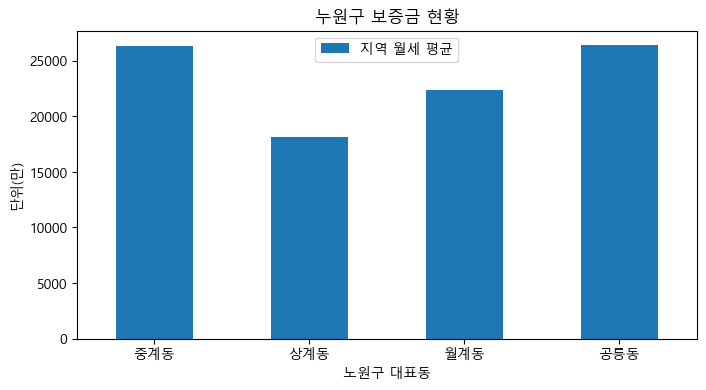

In [318]:
df_rent.plot(kind='bar')
plt.title('누원구 보증금 현황')
plt.xlabel('노원구 대표동')
plt.ylabel('단위(만)')

plt.xticks(rotation=0)

plt.show()

In [274]:
#  6. 각 동의 평균월세를 구해서 bar차트
df_apt_copy.head()

,보증금액,월세금액,건축년도,법정동,아파트명,전용면적,지역코드
0,32000,32000,1999,상계동,불암현대,59.40,11350
1,55000,55000,1989,중계동,상아,84.97,11350
2,48000,48000,2006,월계동,우남푸르미아,84.78,11350
3,30000,30000,1989,상계동,상계대림,59.67,11350
4,17000,17000,1988,상계동,상계주공10(고층),49.94,11350


In [280]:
dong_group = df_apt_copy.groupby(by='법정동')
dong_avg = dong_group['월세금액'].mean()
#dong_avg.reset_index()
#dong_avg = dong_avg.sort_values(ascending=True)
print(dong_avg)

법정동
공릉동    26381.059259
상계동    18133.313343
월계동    22316.338462
중계동    26347.807122
하계동    25331.804598
Name: 월세금액, dtype: float64


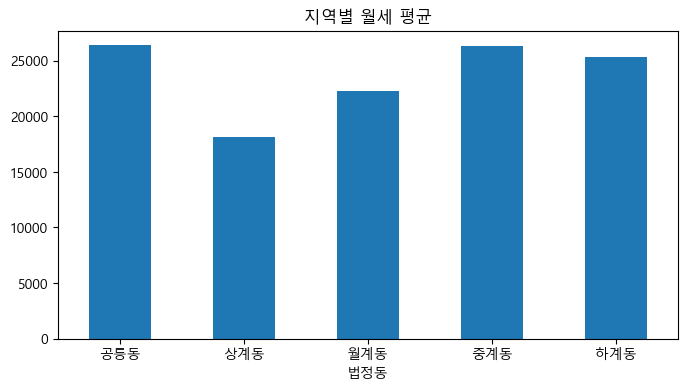

In [282]:
dong_avg.plot(kind='bar')
plt.title('지역별 월세 평균')
plt.xticks(rotation=0)
plt.show()

In [ ]:
7. 보증금에 대한 히스토그램

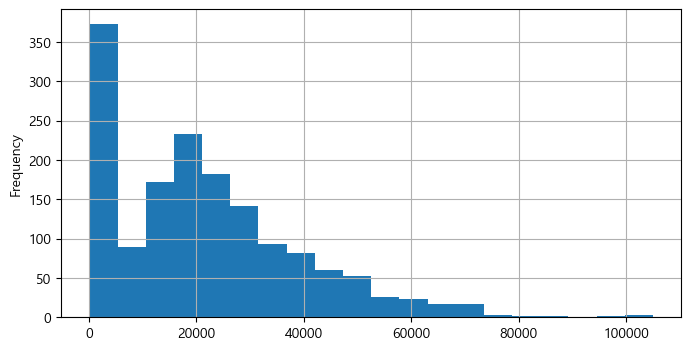

In [334]:
df_apt_copy['보증금액'].plot(kind='hist', bins=20)
plt.grid()
plt.show()

In [ ]:
8. 월세 히스토그램 

<Axes: ylabel='Frequency'>

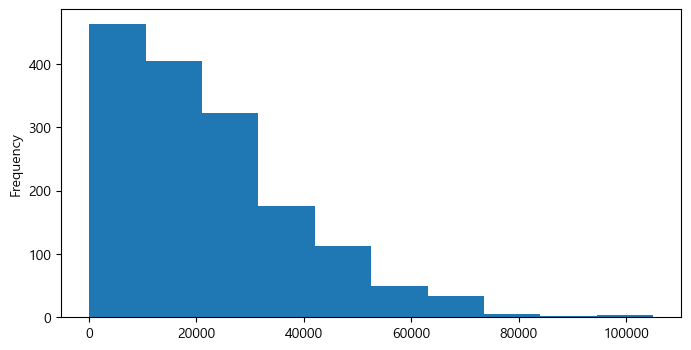

In [328]:
df_apt_copy['월세금액'].plot(kind='hist')